In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Exercise 07.1

I will define here the function that returns the autocorrelation $\chi (t)$ trying to optimize at my best using numpy's function and less for cycle as possible.

In [3]:
def autocorrelation(observable):
    #initialize vector
    auto=np.zeros(len(observable))
    #compute denominator
    tot=np.sum(observable)
    #is it right? t from zero to len-1?
    tmax=len(observable)-1
    #global normalization factor
    norm=np.dot(observable, observable)/tmax-tot*tot/(tmax*tmax)
    cumsum=np.cumsum(observable)
    for i in range( len(observable)-1): #if arrive to len(obs) a division by zero occours
        norm2=tmax-i #normalization factor at the numerator
        a=np.dot(observable[:tmax-i+1], observable[i:])            
        auto[i]=a/norm2-(cumsum[tmax-i]*(tot-cumsum[i]))/(norm2*norm2)
    #arbitrary set correlation a tmax = 0 (auto has been initialized to all zeros, and i am not setting the last
    #component)
    return auto/norm


def last_blocking_error(observable, per_block):
    n_blocks=int(len(observable)/per_block)
    blocks=np.zeros(n_blocks)
    for i in range(n_blocks):
        blocks[i]=np.sum(observable[i*per_block:(i+1)*per_block])
    blocks/=per_block
    blocks2=np.multiply(blocks, blocks)
    
    blocks=np.sum(blocks)
    blocks2=np.sum(blocks2)
    err=np.sqrt((blocks2/n_blocks - np.power(blocks/n_blocks,2))/(n_blocks-1))
        
    return err

It is interesting noting how using numpy functions and some trick the computing time is almost istantanous, while with the vanilla double for cycle it takes hours, good job numpy developers! (you can check later when the function is actually called)

Function for fitting the correlations:

In [4]:
from scipy.optimize import curve_fit
def exponential(x, tau, a):
    return a*np.exp(-x/tau)

## Solid

In [4]:
istant_energy_solid = np.loadtxt("ex07.1-4/solid/outputs/istant_energy.dat")
istant_press_solid = np.loadtxt("ex07.1-4/solid/outputs/istant_press.dat")

In [5]:
solid_press_correlation=autocorrelation(istant_press_solid)
solid_energy_correlation=autocorrelation(istant_energy_solid)

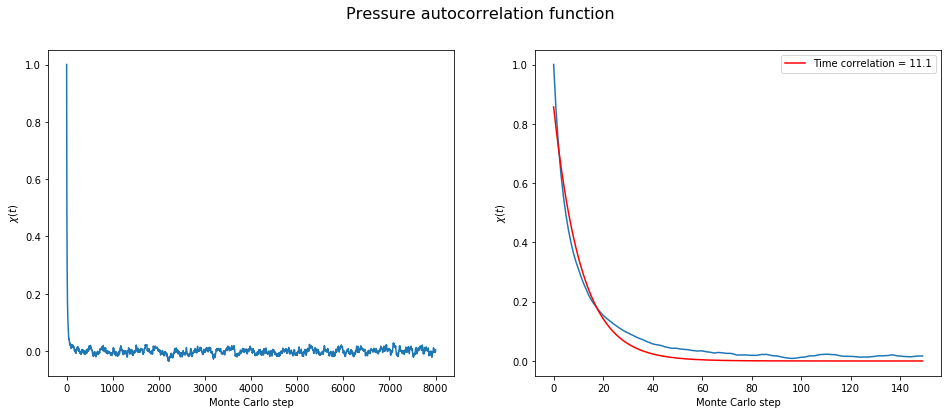

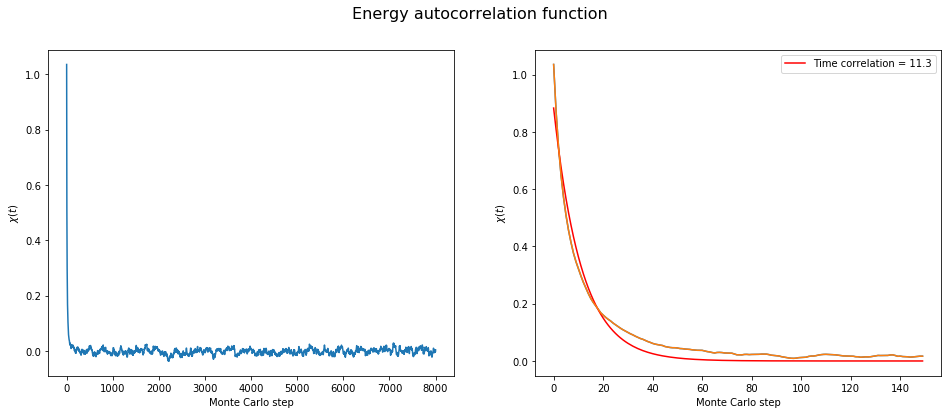

In [6]:
fig,ax = plt.subplots(1, 2, figsize=(16, 6))  ;
fig.suptitle("Pressure autocorrelation function", fontsize=16)
ax[0].plot(solid_press_correlation[:8000])
ax[0].set_xlabel("Monte Carlo step")
ax[0].set_ylabel("$\chi(t)$")

idx=150
x=np.arange(len(solid_press_correlation[:idx]))
popt, pcov  = curve_fit(exponential, x, solid_press_correlation[:idx])
ax[1].plot(solid_press_correlation[:idx])
ax[1].plot(x, exponential(x, *popt), 'r-', label='Time correlation = '+str(round(popt[0],1)))
ax[1].legend()
ax[1].set_xlabel("Monte Carlo step")
ax[1].set_ylabel("$\chi(t)$")



fig,ax = plt.subplots(1, 2, figsize=(16, 6))  ;
fig.suptitle("Energy autocorrelation function", fontsize=16)
ax[0].plot(solid_energy_correlation[:8000])
ax[0].set_xlabel("Monte Carlo step")
ax[0].set_ylabel("$\chi(t)$")


x=np.arange(len(solid_energy_correlation[:idx]));
popt, pcov  = curve_fit(exponential, x, solid_energy_correlation[:idx]);
ax[1].plot(solid_energy_correlation[:idx]);
ax[1].plot(x, exponential(x, *popt), 'r-', label='Time correlation = '+str(round(popt[0],1)));
ax[1].legend();
ax[1].plot(solid_energy_correlation[:idx])
ax[1].set_xlabel("Monte Carlo step");
ax[1].set_ylabel("$\chi(t)$");

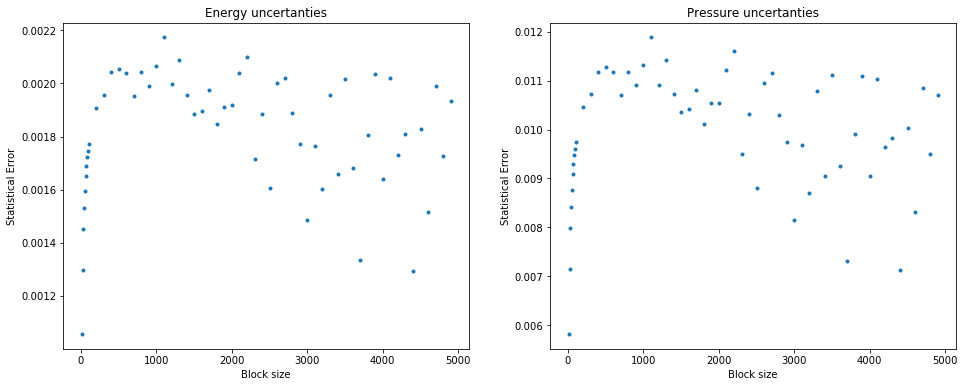

In [7]:
fig,ax = plt.subplots(1, 2, figsize=(16, 6))
#Energy error

errors=[]
value=[]
blk_size=[]
for i in range (10, 100,10):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_energy_solid, i))
    
for i in range (100, 5000,100):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_energy_solid, i))
ax[0].plot(blk_size, errors, linestyle="", marker=".")
ax[0].set_xlabel("Block size")
ax[0].set_ylabel("Statistical Error")
ax[0].set_title("Energy uncertanties")


#istant_press_solid 
errors=[]
value=[]
blk_size=[]
for i in range (10, 100,10):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_press_solid, i))
    
for i in range (100, 5000,100):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_press_solid, i))
ax[1].plot(blk_size, errors, linestyle="", marker=".")
ax[1].set_xlabel("Block size")
ax[1].set_ylabel("Statistical Error")
ax[1].set_title("Pressure uncertanties")

plt.show()


## Liquid

In [8]:
istant_energy_liquid = np.loadtxt("ex07.1-4/liquid/outputs/istant_energy.dat")
istant_press_liquid = np.loadtxt("ex07.1-4/liquid/outputs/istant_press.dat")

In [9]:
liquid_press_correlation=autocorrelation(istant_press_liquid)
liquid_energy_correlation=autocorrelation(istant_energy_liquid)

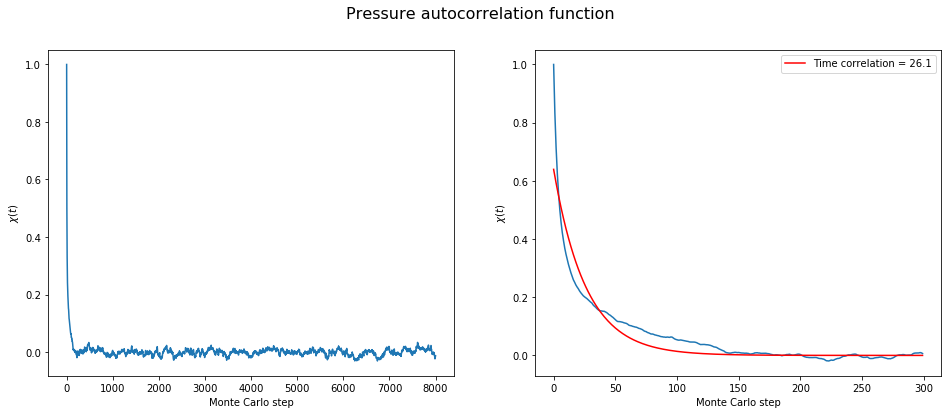

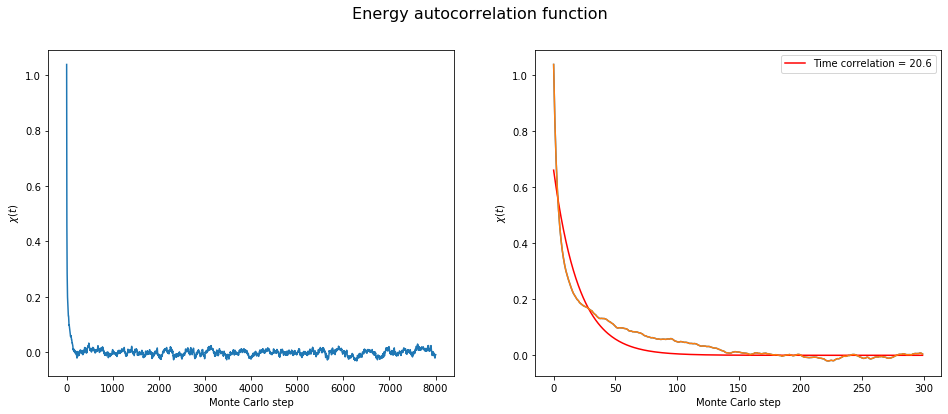

In [10]:
fig,ax = plt.subplots(1, 2, figsize=(16, 6))  ;
fig.suptitle("Pressure autocorrelation function", fontsize=16)
ax[0].plot(liquid_press_correlation[:8000])
ax[0].set_xlabel("Monte Carlo step")
ax[0].set_ylabel("$\chi(t)$")

idx=300
x=np.arange(len(liquid_press_correlation[:idx]))
popt, pcov  = curve_fit(exponential, x, liquid_press_correlation[:idx])
ax[1].plot(liquid_press_correlation[:idx])
ax[1].plot(x, exponential(x, *popt), 'r-', label='Time correlation = '+str(round(popt[0],1)))
ax[1].legend()
ax[1].set_xlabel("Monte Carlo step")
ax[1].set_ylabel("$\chi(t)$")



fig,ax = plt.subplots(1, 2, figsize=(16, 6))  ;
fig.suptitle("Energy autocorrelation function", fontsize=16)
ax[0].plot(liquid_energy_correlation[:8000])
ax[0].set_xlabel("Monte Carlo step")
ax[0].set_ylabel("$\chi(t)$")


x=np.arange(len(liquid_energy_correlation[:idx]));
popt, pcov  = curve_fit(exponential, x, liquid_energy_correlation[:idx]);
ax[1].plot(liquid_energy_correlation[:idx]);
ax[1].plot(x, exponential(x, *popt), 'r-', label='Time correlation = '+str(round(popt[0],1)));
ax[1].legend();
ax[1].plot(liquid_energy_correlation[:idx])
ax[1].set_xlabel("Monte Carlo step");
ax[1].set_ylabel("$\chi(t)$");

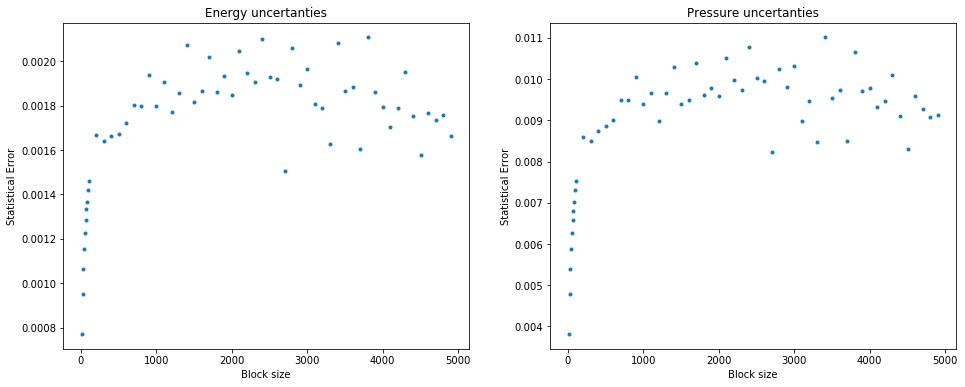

In [11]:
fig,ax = plt.subplots(1, 2, figsize=(16, 6))
#Energy error
errors=[]
value=[]
blk_size=[]
for i in range (10, 100,10):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_energy_liquid, i))
    
for i in range (100, 5000,100):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_energy_liquid, i))
ax[0].plot(blk_size, errors, linestyle="", marker=".")
ax[0].set_xlabel("Block size")
ax[0].set_ylabel("Statistical Error")
ax[0].set_title("Energy uncertanties")


#istant_press_solid 
errors=[]
value=[]
blk_size=[]
for i in range (10, 100,10):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_press_liquid, i))
    
for i in range (100, 5000,100):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_press_liquid, i))
ax[1].plot(blk_size, errors, linestyle="", marker=".")
ax[1].set_xlabel("Block size")
ax[1].set_ylabel("Statistical Error")
ax[1].set_title("Pressure uncertanties")

plt.show()


In [12]:
liquid_energy_correlation[:10]

array([1.03826618, 0.83656123, 0.69634502, 0.59460322, 0.51733044,
       0.4576393 , 0.4118758 , 0.37471726, 0.34583071, 0.32076526])

## Gas

In [5]:
istant_energy_gas = np.loadtxt("ex07.1-4/gas/outputs/istant_energy.dat")
istant_press_gas = np.loadtxt("ex07.1-4/gas/outputs/istant_press.dat")

In [14]:
gas_press_correlation=autocorrelation(istant_press_gas)
gas_energy_correlation=autocorrelation(istant_energy_gas)

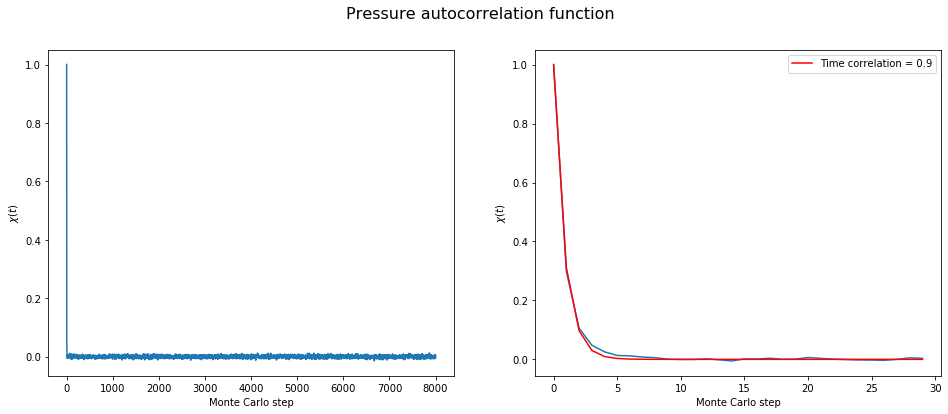

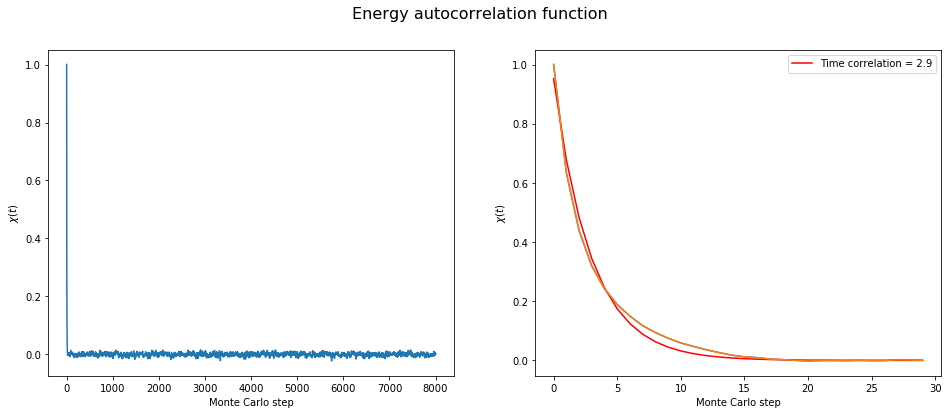

In [15]:
fig,ax = plt.subplots(1, 2, figsize=(16, 6))  ;
fig.suptitle("Pressure autocorrelation function", fontsize=16)
ax[0].plot(gas_press_correlation[:8000])
ax[0].set_xlabel("Monte Carlo step")
ax[0].set_ylabel("$\chi(t)$")

idx=30
x=np.arange(len(gas_press_correlation[:idx]))
popt, pcov  = curve_fit(exponential, x, gas_press_correlation[:idx])
ax[1].plot(gas_press_correlation[:idx])
ax[1].plot(x, exponential(x, *popt), 'r-', label='Time correlation = '+str(round(popt[0],1)))
ax[1].legend()
ax[1].set_xlabel("Monte Carlo step")
ax[1].set_ylabel("$\chi(t)$")



fig,ax = plt.subplots(1, 2, figsize=(16, 6))  ;
fig.suptitle("Energy autocorrelation function", fontsize=16)
ax[0].plot(gas_energy_correlation[:8000])
ax[0].set_xlabel("Monte Carlo step")
ax[0].set_ylabel("$\chi(t)$")


x=np.arange(len(gas_energy_correlation[:idx]));
popt, pcov  = curve_fit(exponential, x, gas_energy_correlation[:idx]);
ax[1].plot(gas_energy_correlation[:idx]);
ax[1].plot(x, exponential(x, *popt), 'r-', label='Time correlation = '+str(round(popt[0],1)));
ax[1].legend();
ax[1].plot(gas_energy_correlation[:idx])
ax[1].set_xlabel("Monte Carlo step");
ax[1].set_ylabel("$\chi(t)$");

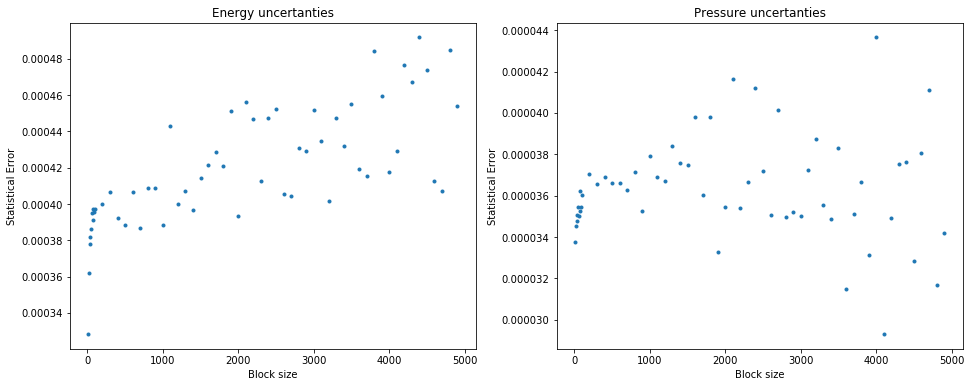

In [16]:
fig,ax = plt.subplots(1, 2, figsize=(16, 6))
#Energy error
errors=[]
value=[]
blk_size=[]
for i in range (10, 100,10):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_energy_gas, i))
    
for i in range (100, 5000,100):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_energy_gas, i))
ax[0].plot(blk_size, errors, linestyle="", marker=".")
ax[0].set_xlabel("Block size")
ax[0].set_ylabel("Statistical Error")
ax[0].set_title("Energy uncertanties")


#istant_press_solid 
errors=[]
value=[]
blk_size=[]
for i in range (10, 100,10):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_press_gas, i))
    
for i in range (100, 5000,100):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_press_gas, i))
ax[1].plot(blk_size, errors, linestyle="", marker=".")
ax[1].set_xlabel("Block size")
ax[1].set_ylabel("Statistical Error")
ax[1].set_title("Pressure uncertanties")

plt.show()

# Exercise 7.4

In [10]:
#physical parameters

k_boltzman=1.38064852*1E-23

#parameters for argon
sigma_argon = 0.34    
epsilon_boltzman_argon = 120  #e/kB
epsilon_argon=epsilon_boltzman_argon*k_boltzman
sigma_si_argon=sigma*1E-9
mass_argon = 39.948*1.66054*1E-27

#parameters for krypton
sigma_krypton = 0.364    
epsilon_boltzman_krypton = 164  #e/kB
epsilon_krypton=epsilon_boltzman_krypton*k_boltzman
sigma_si_krypton=sigma_krypton*1E-9
mass_krypton = 83.798*1.66054*1E-27

## Solid

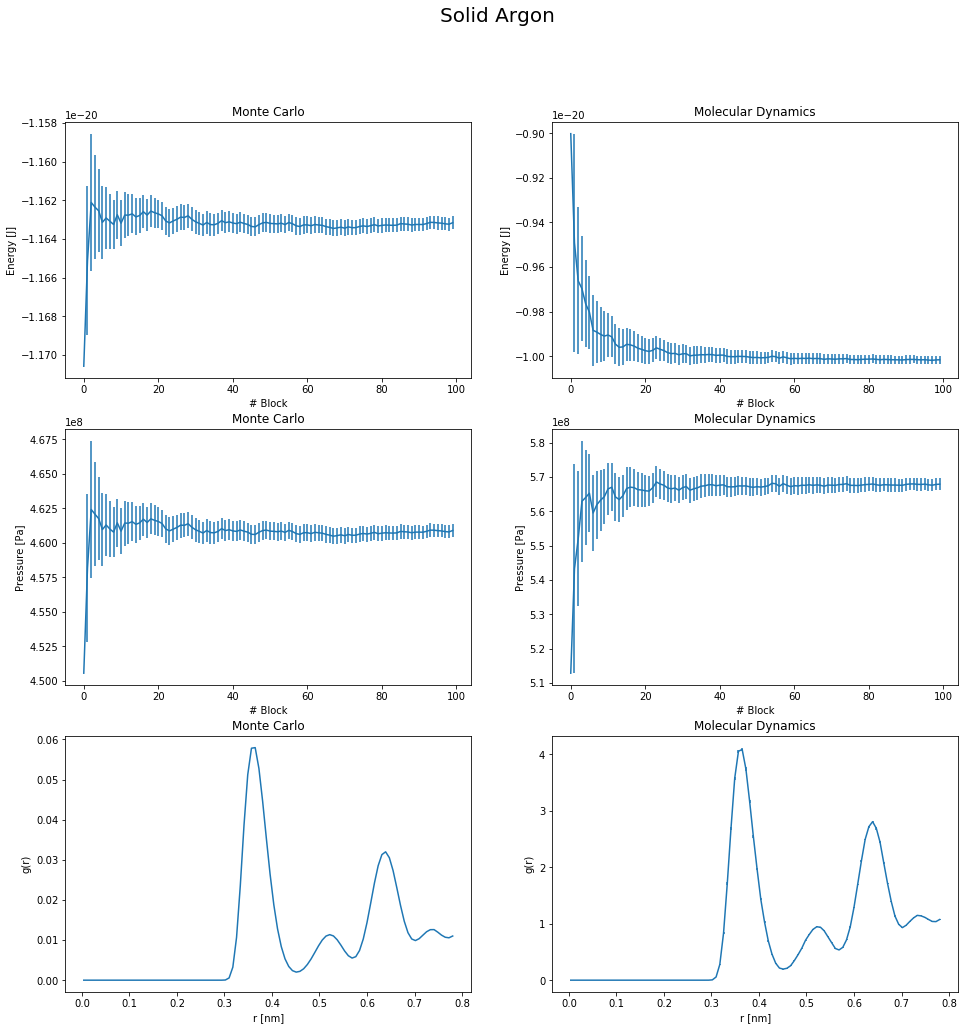

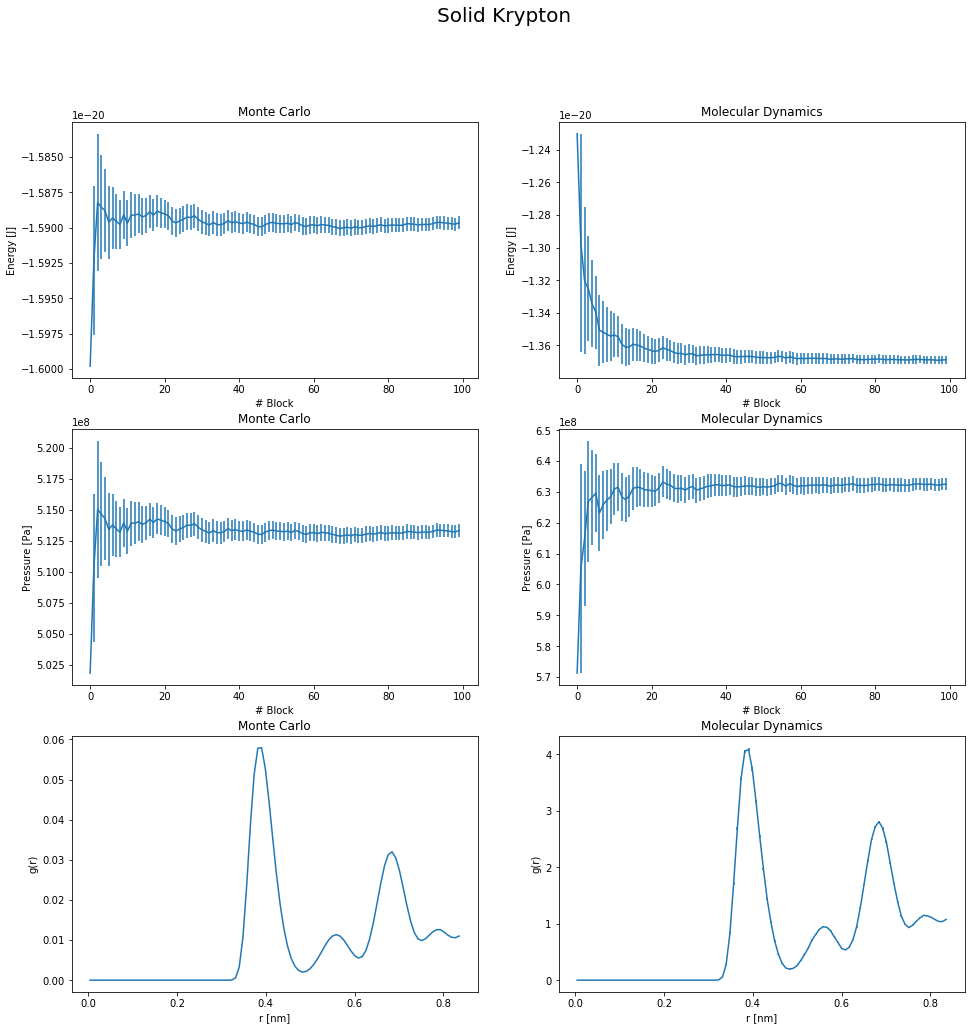

In [27]:
g = np.loadtxt("ex07.1-4/solid/outputs/gave.dat")
r = np.loadtxt("ex07.1-4/solid/outputs/binning.dat")
g_err = np.loadtxt("ex07.1-4/solid/outputs/gerr.dat")
n, tmp, energy, err_energy = np.loadtxt("ex07.1-4/solid/outputs/epot.dat", unpack=True)
n, tmp, press, err_press = np.loadtxt("ex07.1-4/solid/outputs/pres.dat", unpack=True)

g_mol = np.loadtxt("ex07.4_mol/solid/results/g_histo.dat")
r_mol = np.loadtxt("ex07.4_mol/solid/results/binning.dat")
g_err_mol = np.loadtxt("ex07.4_mol/solid/results/g_histo_err.dat")
energy_mol, err_energy_mol = np.loadtxt("ex07.4_mol/solid/results/ave_epot.out", unpack=True)
press_mol, err_press_mol = np.loadtxt("ex07.4_mol/solid/results/ave_press.out", unpack=True)

fig,ax = plt.subplots(3, 2, figsize=(16, 16));
fig.suptitle("Solid Argon", fontsize=20)

#energy
ax[0][0].errorbar(range(energy.size), energy*epsilon_argon, yerr=err_energy*epsilon_argon)
ax[0][0].set_ylabel("Energy [J]")
ax[0][0].set_xlabel("# Block")
ax[0][0].set_title("Monte Carlo")

ax[0][1].errorbar(range(energy_mol.size), energy_mol*epsilon_argon, yerr=err_energy_mol*epsilon_argon)
ax[0][1].set_ylabel("Energy [J]")
ax[0][1].set_xlabel("# Block")
ax[0][1].set_title("Molecular Dynamics")

#press
ax[1][0].errorbar(range(press.size), press*epsilon_argon/(sigma_si_argon**3), yerr=err_press*epsilon_argon/(sigma_si_argon**3))
ax[1][0].set_ylabel("Pressure [Pa]")
ax[1][0].set_xlabel("# Block")
ax[1][0].set_title("Monte Carlo")

ax[1][1].errorbar(range(press_mol.size), press_mol*epsilon_argon/(sigma_si_argon**3), yerr=err_press_mol*epsilon_argon/(sigma_si_argon**3))
ax[1][1].set_ylabel("Pressure [Pa]")
ax[1][1].set_xlabel("# Block")
ax[1][1].set_title("Molecular Dynamics")

#g(r)
ax[2][0].errorbar(r*sigma_argon,g[-1],yerr=g_err[-1])
ax[2][0].set_xlabel("r [nm]")
ax[2][0].set_ylabel("g(r)")
ax[2][0].set_title("Monte Carlo")

ax[2][1].errorbar(r*sigma_argon,g_mol[-1],yerr=g_err_mol[-1])
ax[2][1].set_xlabel("r [nm]")
ax[2][1].set_ylabel("g(r)")
ax[2][1].set_title("Molecular Dynamics");

fig,ax = plt.subplots(3, 2, figsize=(16, 16));
fig.suptitle("Solid Krypton", fontsize=20)

#energy
ax[0][0].errorbar(range(energy.size), energy*epsilon_krypton, yerr=err_energy*epsilon_krypton)
ax[0][0].set_ylabel("Energy [J]")
ax[0][0].set_xlabel("# Block")
ax[0][0].set_title("Monte Carlo")

ax[0][1].errorbar(range(energy_mol.size), energy_mol*epsilon_krypton, yerr=err_energy_mol*epsilon_krypton)
ax[0][1].set_ylabel("Energy [J]")
ax[0][1].set_xlabel("# Block")
ax[0][1].set_title("Molecular Dynamics")

#press
ax[1][0].errorbar(range(press.size), press*epsilon_krypton/(sigma_si_krypton**3), yerr=err_press*epsilon_krypton/(sigma_si_krypton**3))
ax[1][0].set_ylabel("Pressure [Pa]")
ax[1][0].set_xlabel("# Block")
ax[1][0].set_title("Monte Carlo")

ax[1][1].errorbar(range(press_mol.size), press_mol*epsilon_krypton/(sigma_si_krypton**3), yerr=err_press_mol*epsilon_krypton/(sigma_si_krypton**3))
ax[1][1].set_ylabel("Pressure [Pa]")
ax[1][1].set_xlabel("# Block")
ax[1][1].set_title("Molecular Dynamics")

#g(r)
ax[2][0].errorbar(r*sigma_krypton,g[-1],yerr=g_err[-1])
ax[2][0].set_xlabel("r [nm]")
ax[2][0].set_ylabel("g(r)")
ax[2][0].set_title("Monte Carlo")

ax[2][1].errorbar(r*sigma_krypton,g_mol[-1],yerr=g_err_mol[-1])
ax[2][1].set_xlabel("r [nm]")
ax[2][1].set_ylabel("g(r)")
ax[2][1].set_title("Molecular Dynamics");

## Liquid

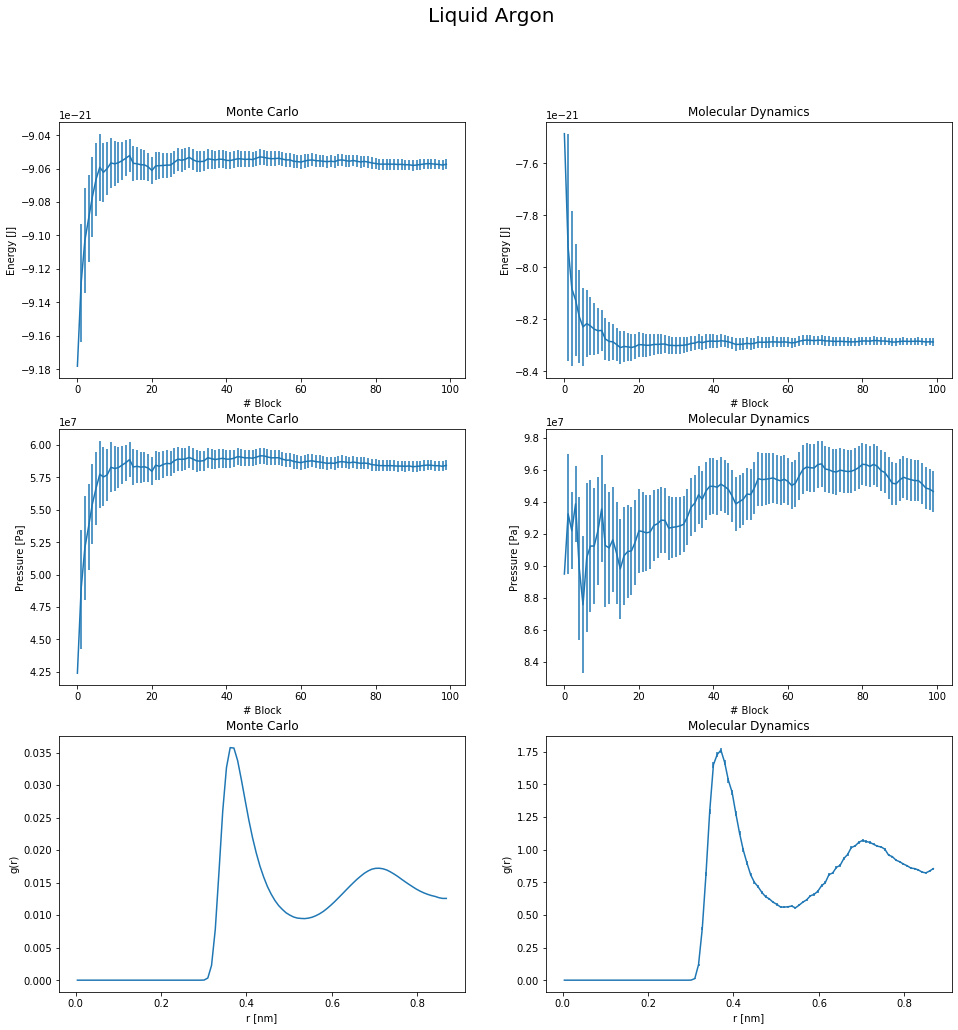

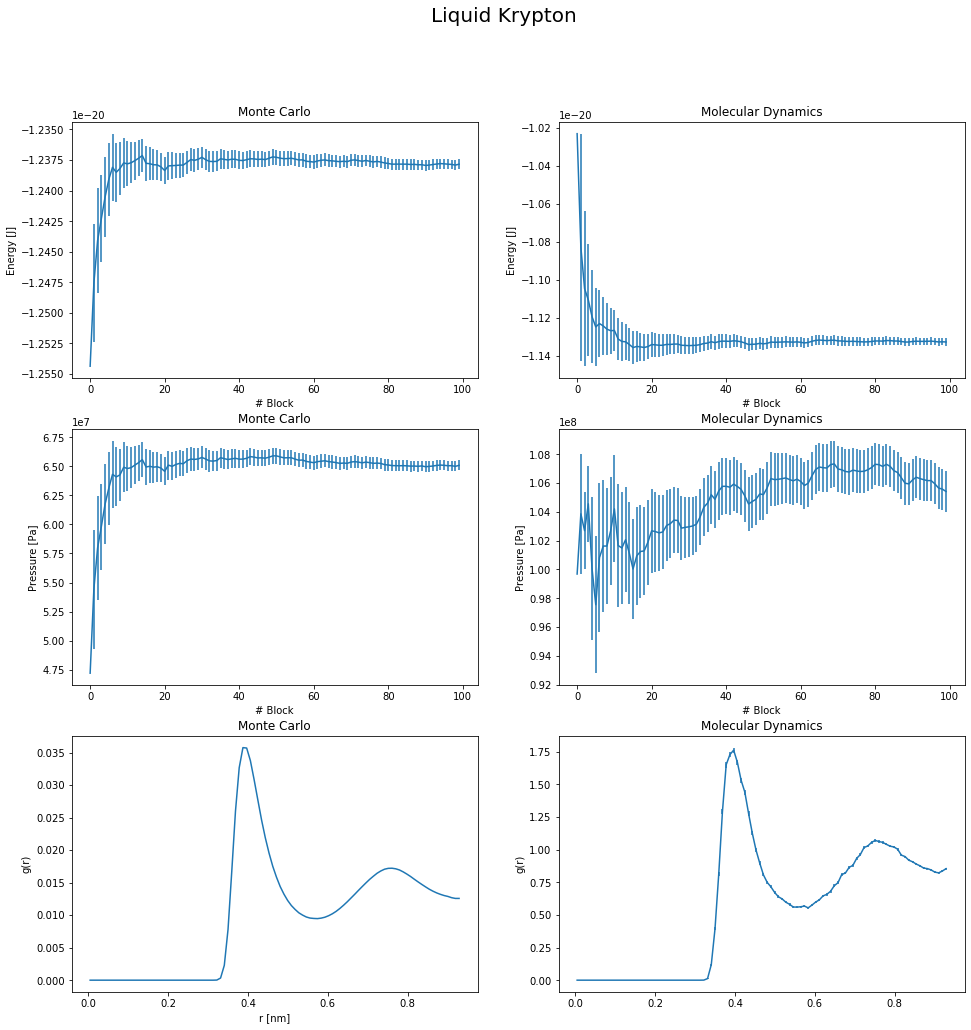

In [29]:
g = np.loadtxt("ex07.1-4/liquid/outputs/gave.dat")
r = np.loadtxt("ex07.1-4/liquid/outputs/binning.dat")
g_err = np.loadtxt("ex07.1-4/liquid/outputs/gerr.dat")
n, tmp, energy, err_energy = np.loadtxt("ex07.1-4/liquid/outputs/epot.dat", unpack=True)
n, tmp, press, err_press = np.loadtxt("ex07.1-4/liquid/outputs/pres.dat", unpack=True)

g_mol = np.loadtxt("ex07.4_mol/liquid/results/g_histo.dat")
r_mol = np.loadtxt("ex07.4_mol/liquid/results/binning.dat")
g_err_mol = np.loadtxt("ex07.4_mol/liquid/results/g_histo_err.dat")
energy_mol, err_energy_mol = np.loadtxt("ex07.4_mol/liquid/results/ave_epot.out", unpack=True)
press_mol, err_press_mol = np.loadtxt("ex07.4_mol/liquid/results/ave_press.out", unpack=True)

fig,ax = plt.subplots(3, 2, figsize=(16, 16));
fig.suptitle("Liquid Argon", fontsize=20)

#energy
ax[0][0].errorbar(range(energy.size), energy*epsilon_argon, yerr=err_energy*epsilon_argon)
ax[0][0].set_ylabel("Energy [J]")
ax[0][0].set_xlabel("# Block")
ax[0][0].set_title("Monte Carlo")

ax[0][1].errorbar(range(energy_mol.size), energy_mol*epsilon_argon, yerr=err_energy_mol*epsilon_argon)
ax[0][1].set_ylabel("Energy [J]")
ax[0][1].set_xlabel("# Block")
ax[0][1].set_title("Molecular Dynamics")

#press
ax[1][0].errorbar(range(press.size), press*epsilon_argon/(sigma_si_argon**3), yerr=err_press*epsilon_argon/(sigma_si_argon**3))
ax[1][0].set_ylabel("Pressure [Pa]")
ax[1][0].set_xlabel("# Block")
ax[1][0].set_title("Monte Carlo")

ax[1][1].errorbar(range(press_mol.size), press_mol*epsilon_argon/(sigma_si_argon**3), yerr=err_press_mol*epsilon_argon/(sigma_si_argon**3))
ax[1][1].set_ylabel("Pressure [Pa]")
ax[1][1].set_xlabel("# Block")
ax[1][1].set_title("Molecular Dynamics")

#g(r)
ax[2][0].errorbar(r*sigma_argon,g[-1],yerr=g_err[-1])
ax[2][0].set_xlabel("r [nm]")
ax[2][0].set_ylabel("g(r)")
ax[2][0].set_title("Monte Carlo")

ax[2][1].errorbar(r*sigma_argon,g_mol[-1],yerr=g_err_mol[-1])
ax[2][1].set_xlabel("r [nm]")
ax[2][1].set_ylabel("g(r)")
ax[2][1].set_title("Molecular Dynamics");

fig,ax = plt.subplots(3, 2, figsize=(16, 16));
fig.suptitle("Liquid Krypton", fontsize=20)

#energy
ax[0][0].errorbar(range(energy.size), energy*epsilon_krypton, yerr=err_energy*epsilon_krypton)
ax[0][0].set_ylabel("Energy [J]")
ax[0][0].set_xlabel("# Block")
ax[0][0].set_title("Monte Carlo")

ax[0][1].errorbar(range(energy_mol.size), energy_mol*epsilon_krypton, yerr=err_energy_mol*epsilon_krypton)
ax[0][1].set_ylabel("Energy [J]")
ax[0][1].set_xlabel("# Block")
ax[0][1].set_title("Molecular Dynamics")

#press
ax[1][0].errorbar(range(press.size), press*epsilon_krypton/(sigma_si_krypton**3), yerr=err_press*epsilon_krypton/(sigma_si_krypton**3))
ax[1][0].set_ylabel("Pressure [Pa]")
ax[1][0].set_xlabel("# Block")
ax[1][0].set_title("Monte Carlo")

ax[1][1].errorbar(range(press_mol.size), press_mol*epsilon_krypton/(sigma_si_krypton**3), yerr=err_press_mol*epsilon_krypton/(sigma_si_krypton**3))
ax[1][1].set_ylabel("Pressure [Pa]")
ax[1][1].set_xlabel("# Block")
ax[1][1].set_title("Molecular Dynamics")

#g(r)
ax[2][0].errorbar(r*sigma_krypton,g[-1],yerr=g_err[-1])
ax[2][0].set_xlabel("r [nm]")
ax[2][0].set_ylabel("g(r)")
ax[2][0].set_title("Monte Carlo")

ax[2][1].errorbar(r*sigma_krypton,g_mol[-1],yerr=g_err_mol[-1])
ax[2][0].set_xlabel("r [nm]")
ax[2][1].set_ylabel("g(r)")
ax[2][1].set_title("Molecular Dynamics");

## Gas

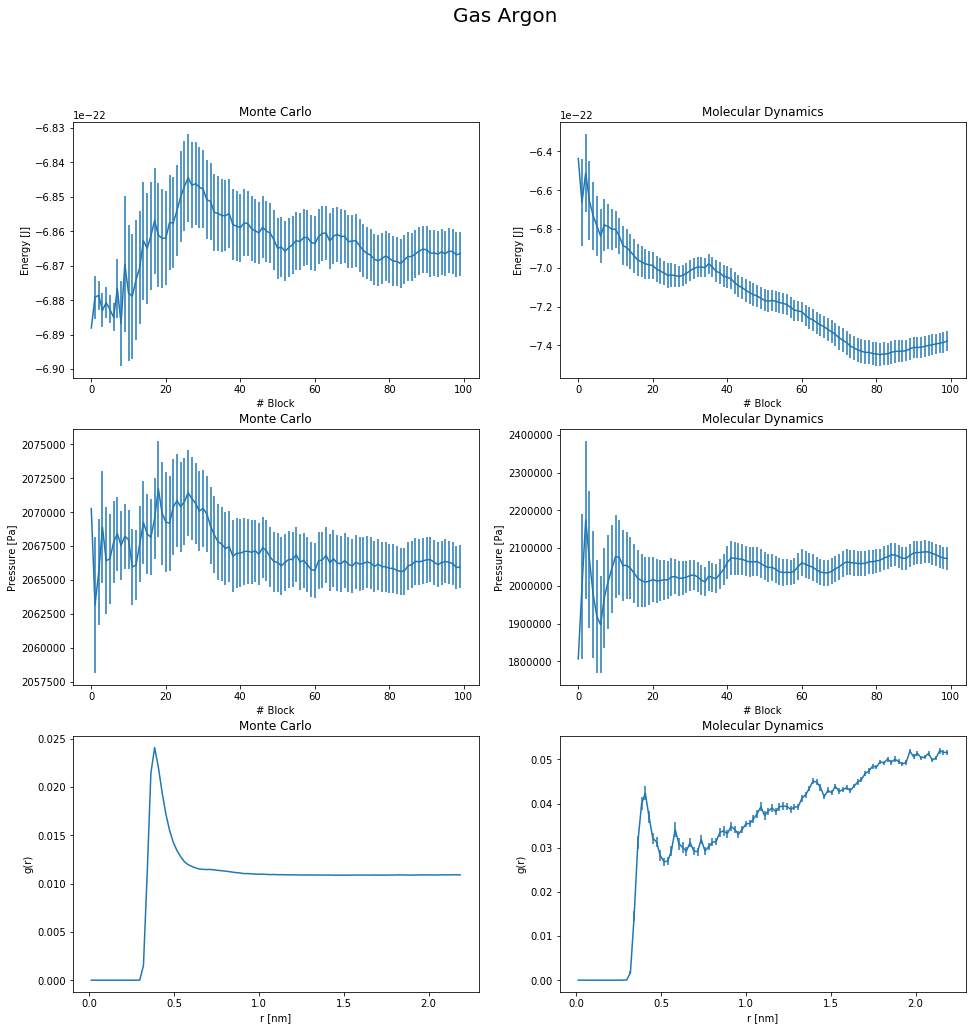

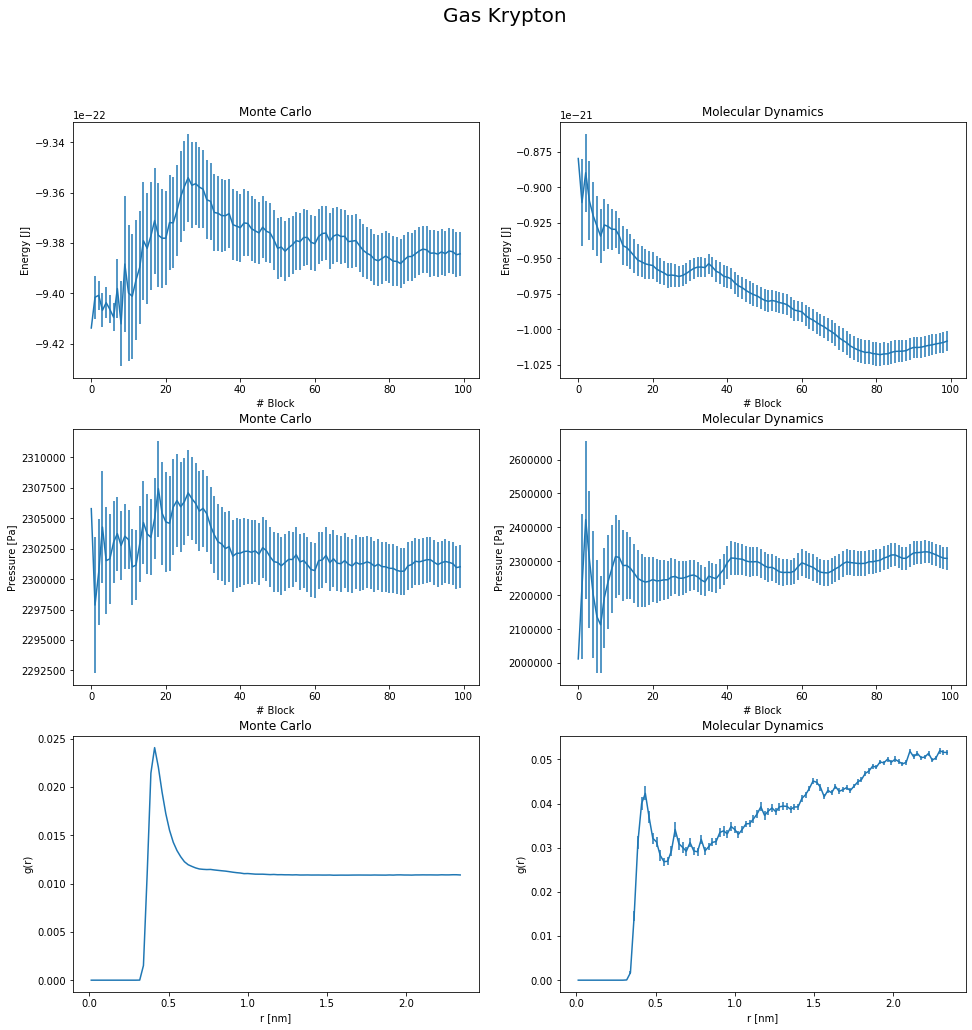

In [28]:
g = np.loadtxt("ex07.1-4/gas/outputs/gave.dat")
r = np.loadtxt("ex07.1-4/gas/outputs/binning.dat")
g_err = np.loadtxt("ex07.1-4/gas/outputs/gerr.dat")
n, tmp, energy, err_energy = np.loadtxt("ex07.1-4/gas/outputs/epot.dat", unpack=True)
n, tmp, press, err_press = np.loadtxt("ex07.1-4/gas/outputs/pres.dat", unpack=True)

g_mol = np.loadtxt("ex07.4_mol/gas/results/g_histo.dat")
r_mol = np.loadtxt("ex07.4_mol/gas/results/binning.dat")
g_err_mol = np.loadtxt("ex07.4_mol/gas/results/g_histo_err.dat")
energy_mol, err_energy_mol = np.loadtxt("ex07.4_mol/gas/results/ave_epot.out", unpack=True)
press_mol, err_press_mol = np.loadtxt("ex07.4_mol/gas/results/ave_press.out", unpack=True)

fig,ax = plt.subplots(3, 2, figsize=(16, 16));
fig.suptitle("Gas Argon", fontsize=20)

#energy
ax[0][0].errorbar(range(energy.size), energy*epsilon_argon, yerr=err_energy*epsilon_argon)
ax[0][0].set_ylabel("Energy [J]")
ax[0][0].set_xlabel("# Block")
ax[0][0].set_title("Monte Carlo")

ax[0][1].errorbar(range(energy_mol.size), energy_mol*epsilon_argon, yerr=err_energy_mol*epsilon_argon)
ax[0][1].set_ylabel("Energy [J]")
ax[0][1].set_xlabel("# Block")
ax[0][1].set_title("Molecular Dynamics")

#press
ax[1][0].errorbar(range(press.size), press*epsilon_argon/(sigma_si_argon**3), yerr=err_press*epsilon_argon/(sigma_si_argon**3))
ax[1][0].set_ylabel("Pressure [Pa]")
ax[1][0].set_xlabel("# Block")
ax[1][0].set_title("Monte Carlo")

ax[1][1].errorbar(range(press_mol.size), press_mol*epsilon_argon/(sigma_si_argon**3), yerr=err_press_mol*epsilon_argon/(sigma_si_argon**3))
ax[1][1].set_ylabel("Pressure [Pa]")
ax[1][1].set_xlabel("# Block")
ax[1][1].set_title("Molecular Dynamics")

#g(r)
ax[2][0].errorbar(r*sigma_argon,g[-1],yerr=g_err[-1])
ax[2][0].set_xlabel("r [nm]")
ax[2][0].set_ylabel("g(r)")
ax[2][0].set_title("Monte Carlo")

ax[2][1].errorbar(r*sigma_argon,g_mol[-1],yerr=g_err_mol[-1])
ax[2][1].set_xlabel("r [nm]")
ax[2][1].set_ylabel("g(r)")
ax[2][1].set_title("Molecular Dynamics");

fig,ax = plt.subplots(3, 2, figsize=(16, 16));
fig.suptitle("Gas Krypton", fontsize=20)

#energy
ax[0][0].errorbar(range(energy.size), energy*epsilon_krypton, yerr=err_energy*epsilon_krypton)
ax[0][0].set_ylabel("Energy [J]")
ax[0][0].set_xlabel("# Block")
ax[0][0].set_title("Monte Carlo")

ax[0][1].errorbar(range(energy_mol.size), energy_mol*epsilon_krypton, yerr=err_energy_mol*epsilon_krypton)
ax[0][1].set_ylabel("Energy [J]")
ax[0][1].set_xlabel("# Block")
ax[0][1].set_title("Molecular Dynamics")

#press
ax[1][0].errorbar(range(press.size), press*epsilon_krypton/(sigma_si_krypton**3), yerr=err_press*epsilon_krypton/(sigma_si_krypton**3))
ax[1][0].set_ylabel("Pressure [Pa]")
ax[1][0].set_xlabel("# Block")
ax[1][0].set_title("Monte Carlo")

ax[1][1].errorbar(range(press_mol.size), press_mol*epsilon_krypton/(sigma_si_krypton**3), yerr=err_press_mol*epsilon_krypton/(sigma_si_krypton**3))
ax[1][1].set_ylabel("Pressure [Pa]")
ax[1][1].set_xlabel("# Block")
ax[1][1].set_title("Molecular Dynamics")

#g(r)
ax[2][0].errorbar(r*sigma_krypton,g[-1],yerr=g_err[-1])
ax[2][0].set_xlabel("r [nm]")
ax[2][0].set_ylabel("g(r)")
ax[2][0].set_title("Monte Carlo")

ax[2][1].errorbar(r*sigma_krypton,g_mol[-1],yerr=g_err_mol[-1])
ax[2][1].set_xlabel("r [nm]")
ax[2][1].set_ylabel("g(r)")
ax[2][1].set_title("Molecular Dynamics");